# Bank Customer Churn Prediction

#### The aim of the project is to develop a predictive model that can accurately forecast whether a customer is likely to stay with the bank or leave (churn).

### Importing Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
df=pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Customer_Churn\Churn_Modelling.csv",
                 index_col="RowNumber")
df = df.drop("CustomerId",axis=1)

### Checking Data

In [3]:
df.shape

(10000, 12)

In [4]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Checking Outliers
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

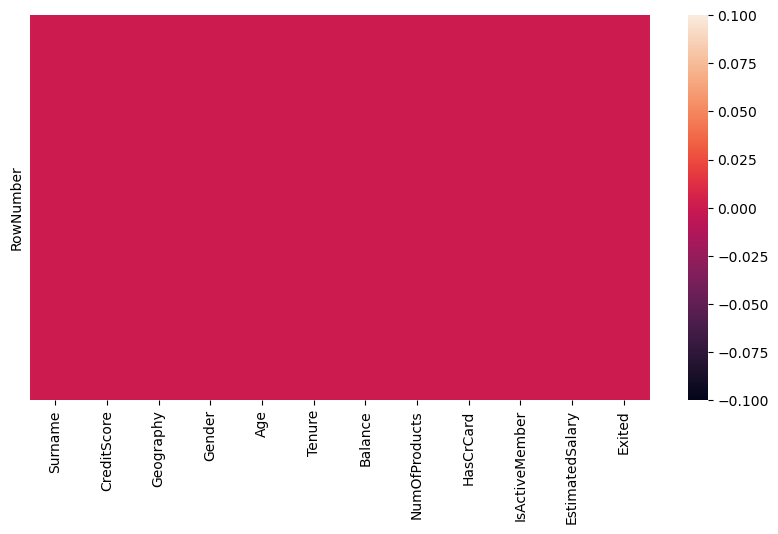

In [7]:
# Checking Outliers Using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [8]:
# Checking Duplicates
df.duplicated().sum()

0

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA

### Univarient Analysis

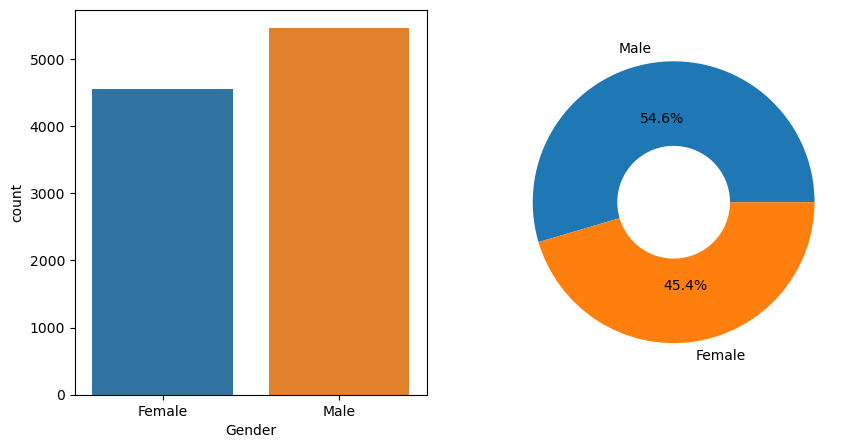

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df["Gender"])
plt.subplot(1,2,2)
plt.pie(df.Gender.value_counts(),autopct='%1.1f%%',labels=["Male","Female"])
plt.pie([1],radius=0.4,colors="w")
plt.show()

54.6 % Customers are Male

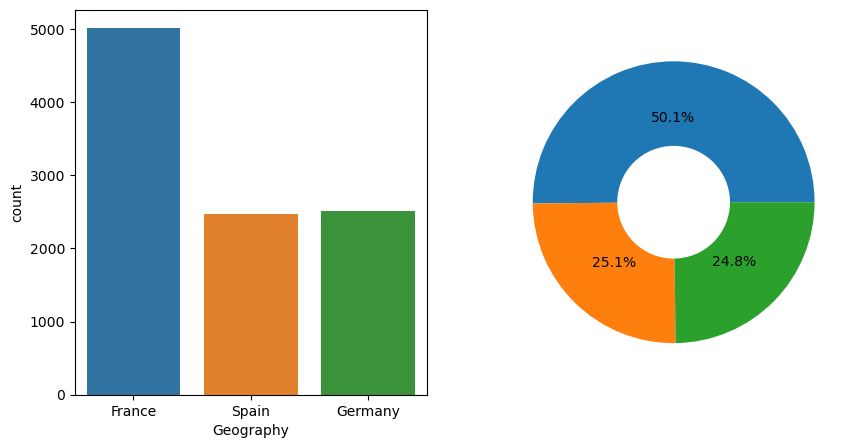

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.Geography)
plt.subplot(1,2,2)
plt.pie(df.Geography.value_counts(),autopct='%1.1f%%')
plt.pie([1],radius=0.4,colors="w")
plt.show()

50.1% customers belong to France

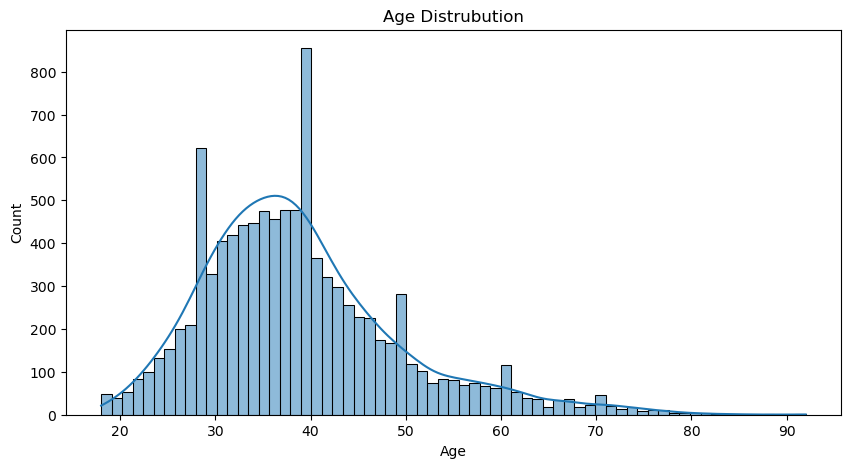

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df.Age,kde=True)
plt.title("Age Distrubution")
plt.show()

Most Customer belong to 30 - 40 Age group\
There are some outliers 

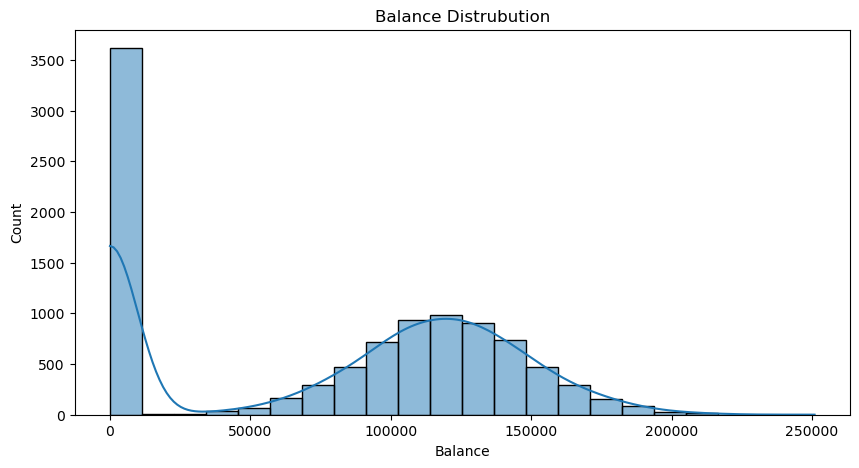

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df.Balance,kde=True)
plt.title("Balance Distrubution")
plt.show()

Most Customers are having 0 balance and other than that maximum customer belong to 100000 - 150000 and it forms normal distribution

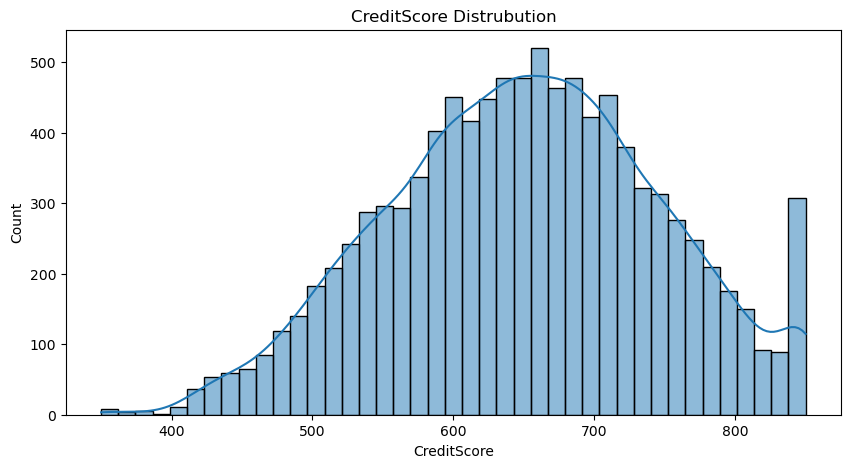

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df.CreditScore,kde=True)
plt.title("CreditScore Distrubution")
plt.show()

Credit Score of most ciustomers lies between 600 - 700


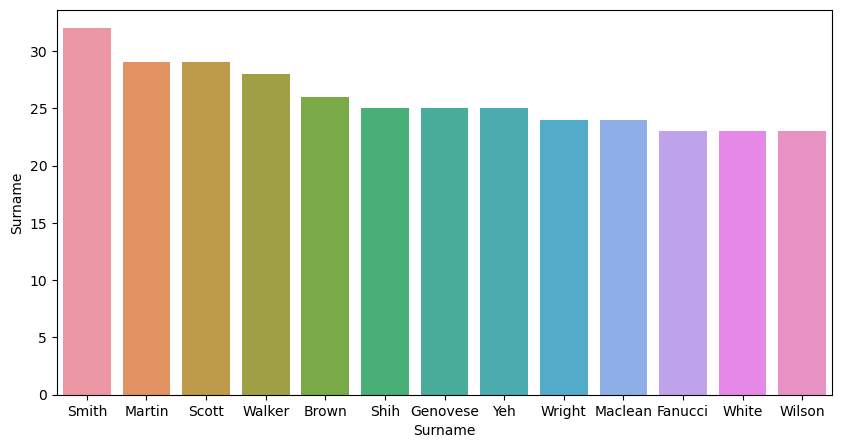

In [15]:
plt.figure(figsize=(10,5))
data=df.groupby("Surname")["Surname"]
sname=data.count().sort_values(ascending=False)
sns.barplot(y=sname.head(13),x=sname.head(13).index)
plt.show()

Most Users with same surname are smith,Martin and Scott

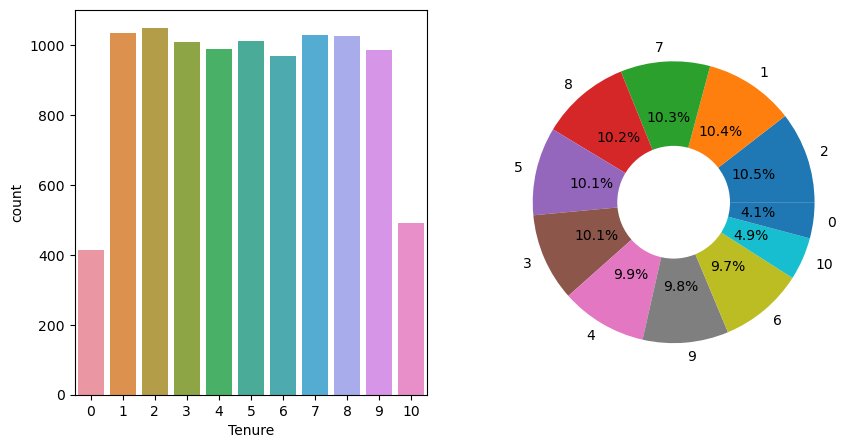

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.Tenure)
plt.subplot(1,2,2)
plt.pie(df.Tenure.value_counts(),autopct='%1.1f%%',labels=df.Tenure.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

Users with 0 and 10 Tenure are less

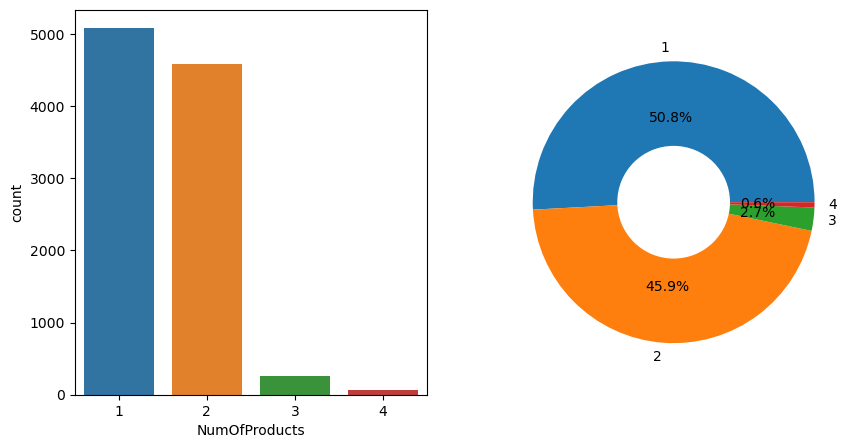

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.NumOfProducts)
plt.subplot(1,2,2)
plt.pie(df.NumOfProducts.value_counts(),autopct='%1.1f%%',labels=df.NumOfProducts.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

most customers are having 1 product

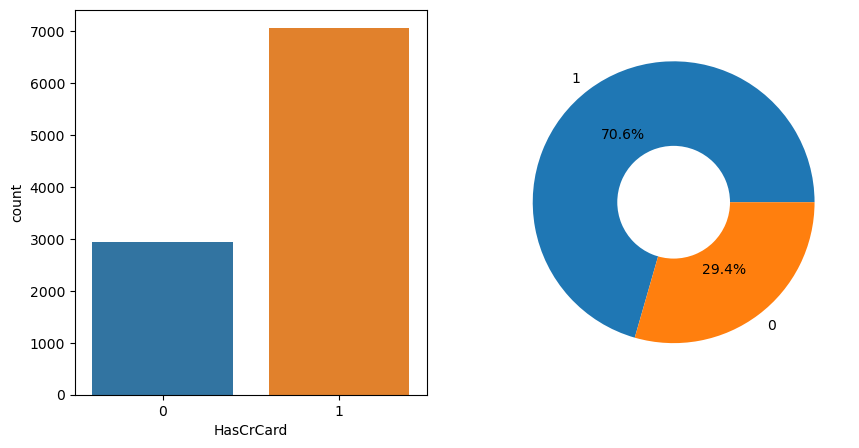

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.HasCrCard)
plt.subplot(1,2,2)
plt.pie(df.HasCrCard.value_counts(),autopct='%1.1f%%',labels=df.HasCrCard.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

Mejority of customer are having Credit Card

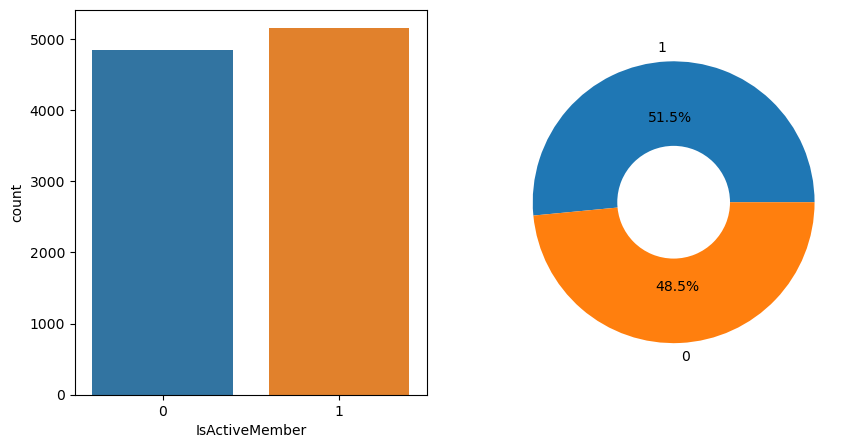

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.IsActiveMember)
plt.subplot(1,2,2)
plt.pie(df.IsActiveMember.value_counts(),autopct='%1.1f%%',labels=df.IsActiveMember.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

51 % users are active

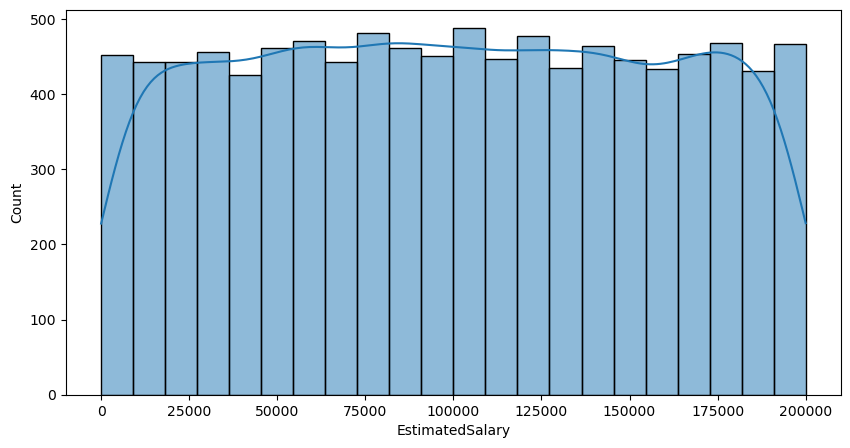

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df.EstimatedSalary,kde=True)
plt.show()

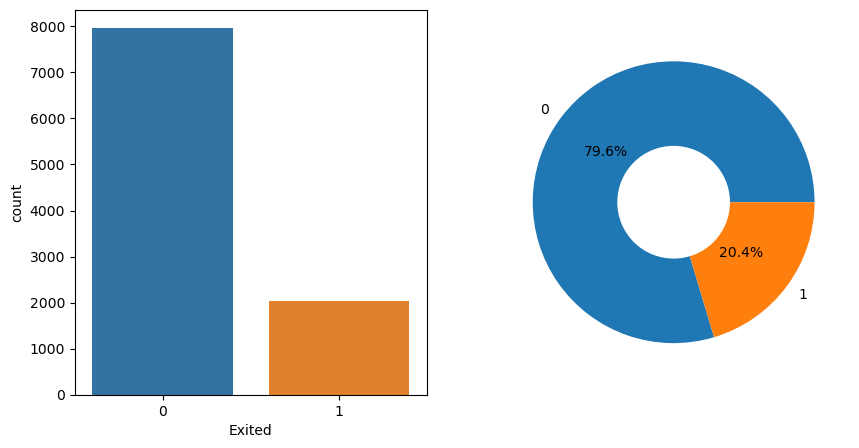

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.Exited)
plt.subplot(1,2,2)
plt.pie(df.Exited.value_counts(),autopct='%1.1f%%',labels=df.Exited.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

20 % of users have exited the bank. 

The Data is Imbalance\
Resampling is Required

# Bivarient Analysis

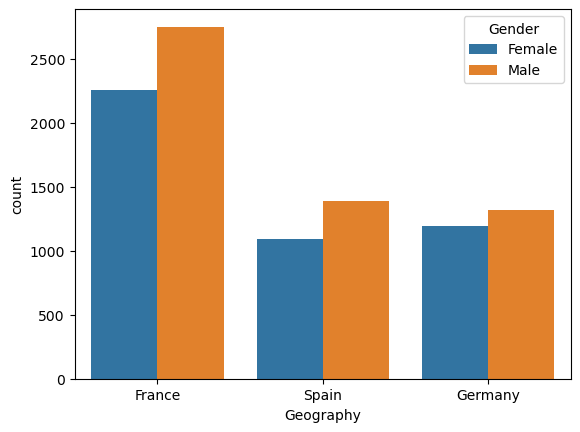

In [22]:
# Geography vs Gender
sns.countplot(x=df.Geography,hue=df.Gender)
plt.show()

Each Country is having maximum Males

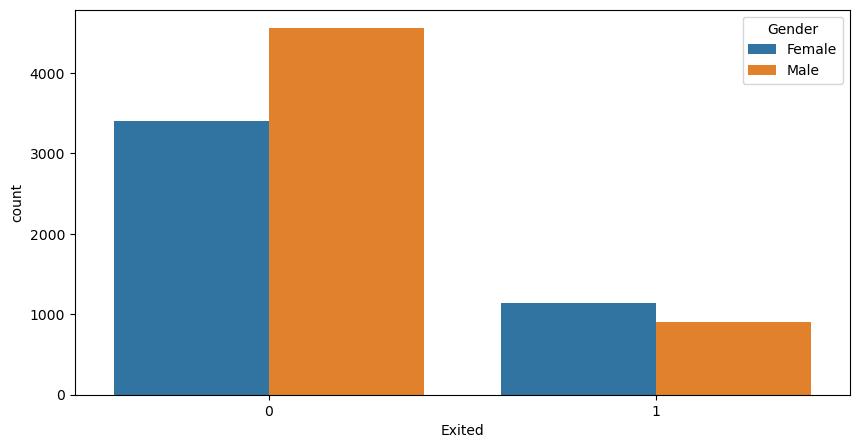

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Exited,hue=df.Gender)
plt.show()

- Maximum Females are exiting the bank
- Inactiver users are exiting the bank

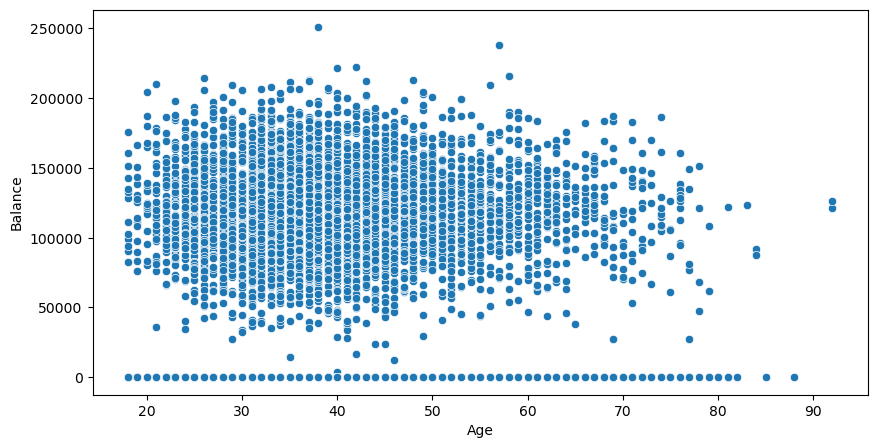

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.Balance)
plt.show()

As Age increases the users decreases

### Checking Outliers

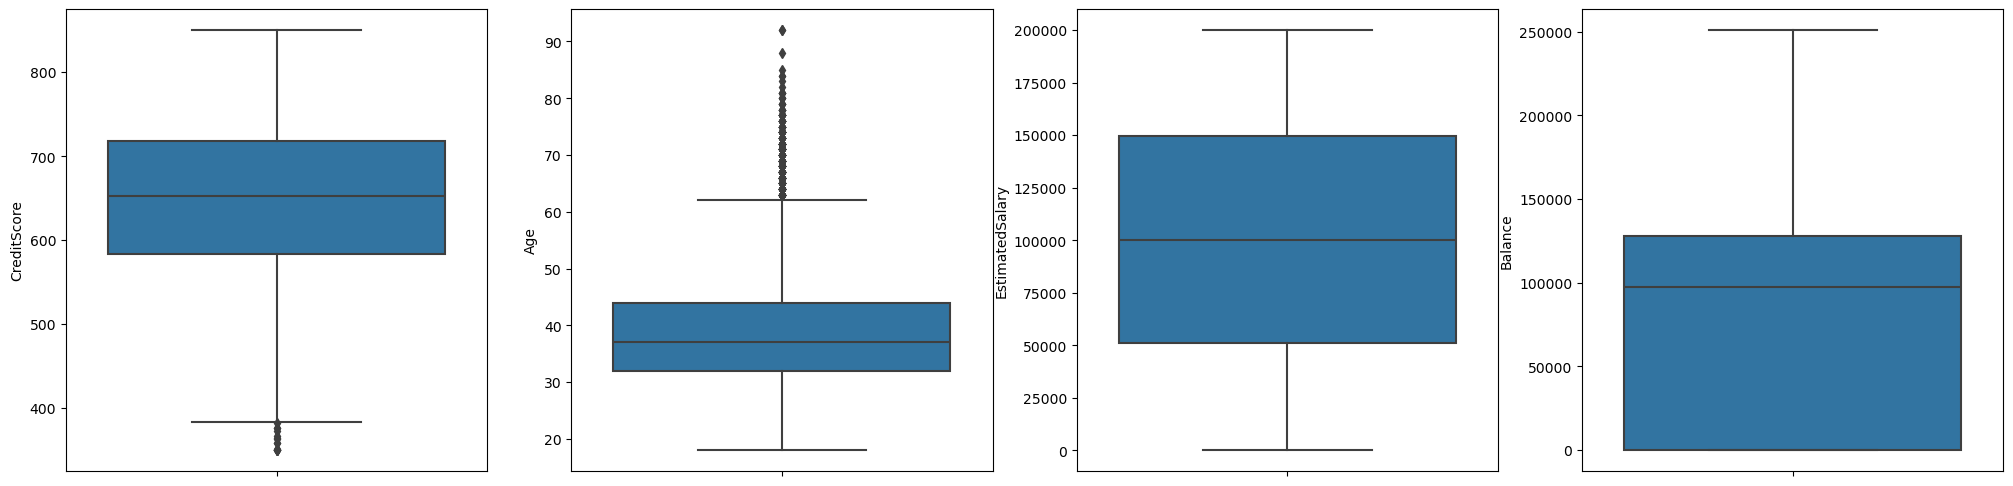

In [25]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.boxplot(y=df.CreditScore)
plt.subplot(1,4,2)
sns.boxplot(y=df.Age)
plt.subplot(1,4,3)
sns.boxplot(y=df.EstimatedSalary)
plt.subplot(1,4,4)
sns.boxplot(y=df.Balance)
plt.show()

In [26]:
# Converting Numeric data to Catagory(Binning)
# Binning CreditScore Column
df.CreditScore = pd.cut(x=df.CreditScore,bins=[0,500,600,700,800,1050],labels=[0,1,2,3,4])

In [27]:
# Binning Age Column
df.Age = pd.cut(x=df.Age,bins=[0,20,30,40,50,60,70,1000],labels=[0,1,2,3,4,5,6])

In [28]:
# Binning Surname Column
sname=df.groupby("Surname")["Surname"].count().nlargest(10).index
df['Surname'] = np.where(~df['Surname'].isin(sname), "other", df['Surname'])


In [29]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,other,2,France,Female,3,2,0.00,1,1,1,101348.88,1
2,other,2,Spain,Female,3,1,83807.86,1,0,1,112542.58,0
3,other,1,France,Female,3,8,159660.80,3,1,0,113931.57,1
4,other,2,France,Female,2,1,0.00,2,0,0,93826.63,0
5,other,4,Spain,Female,3,2,125510.82,1,1,1,79084.10,0


# Encoding

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
transform =ColumnTransformer( transformers=[
    (["Nominal_encode",OneHotEncoder(sparse_output=False,drop="first"),["Surname","Age","Geography","Gender","NumOfProducts"]]),
    (["Scaling",StandardScaler(),["Balance","EstimatedSalary"]])
    ], remainder="passthrough")
data = transform.fit_transform(df)
df1=pd.DataFrame(data,columns=transform.get_feature_names_out())
df1.head()

,Nominal_encode__Surname_Genovese,Nominal_encode__Surname_Maclean,Nominal_encode__Surname_Martin,Nominal_encode__Surname_Scott,Nominal_encode__Surname_Shih,Nominal_encode__Surname_Smith,Nominal_encode__Surname_Walker,Nominal_encode__Surname_Wright,Nominal_encode__Surname_Yeh,Nominal_encode__Surname_other,...,Nominal_encode__NumOfProducts_2,Nominal_encode__NumOfProducts_3,Nominal_encode__NumOfProducts_4,Scaling__Balance,Scaling__EstimatedSalary,remainder__CreditScore,remainder__Tenure,remainder__HasCrCard,remainder__IsActiveMember,remainder__Exited
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.225848,0.021886,2.0,2.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.117350,0.216534,2.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.333053,0.240687,1.0,8.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,-1.225848,-0.108918,2.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.785728,-0.365276,4.0,2.0,1.0,1.0,0.0


# Check Corelation

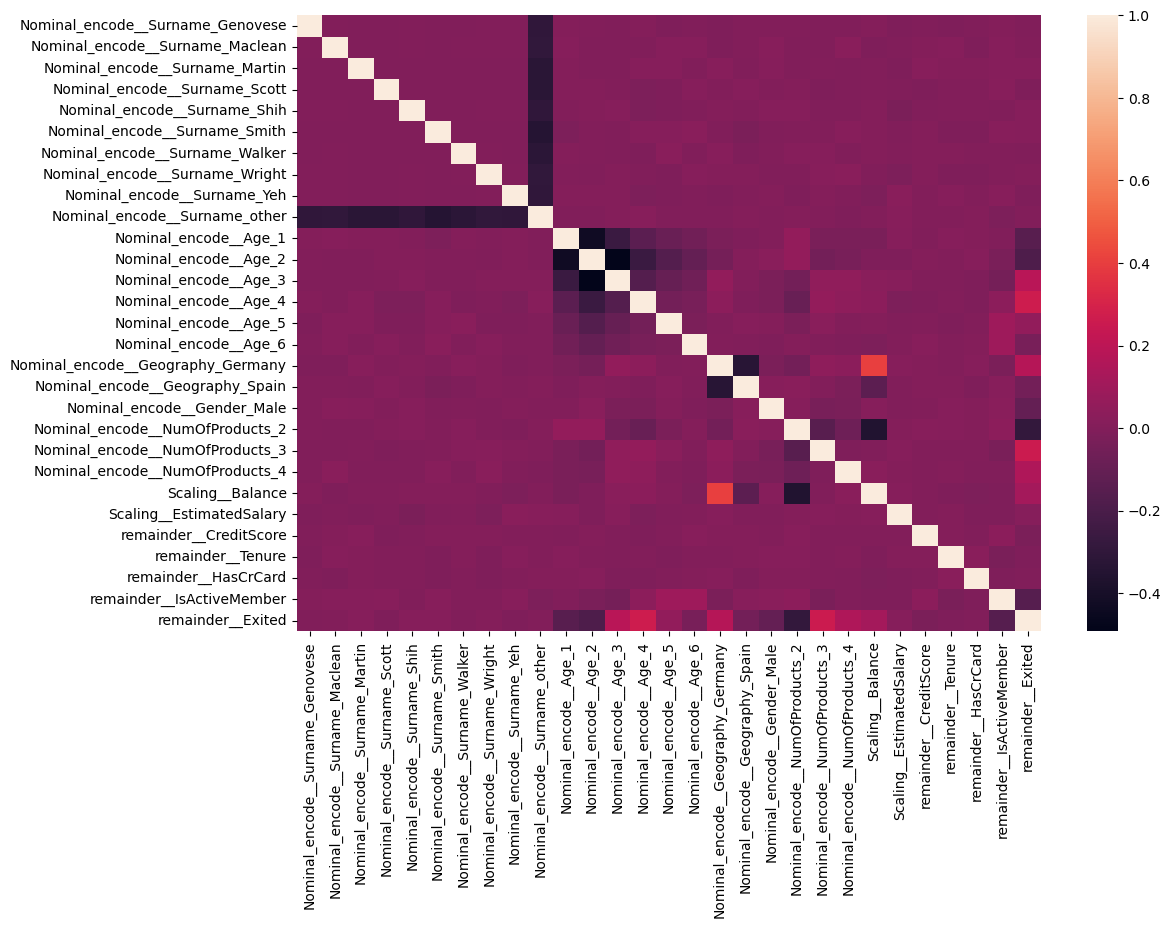

In [31]:

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),)
plt.show()

In [32]:
for index1,row in enumerate(df1.corr().values):
    for index2,cell in enumerate(row):
        if index1!=index2 and cell>0.4:
            print(df1.corr().index[index1],cell)

Nominal_encode__Geography_Germany 0.4011102451620938
Scaling__Balance 0.4011102451620938


# Balancing the Data

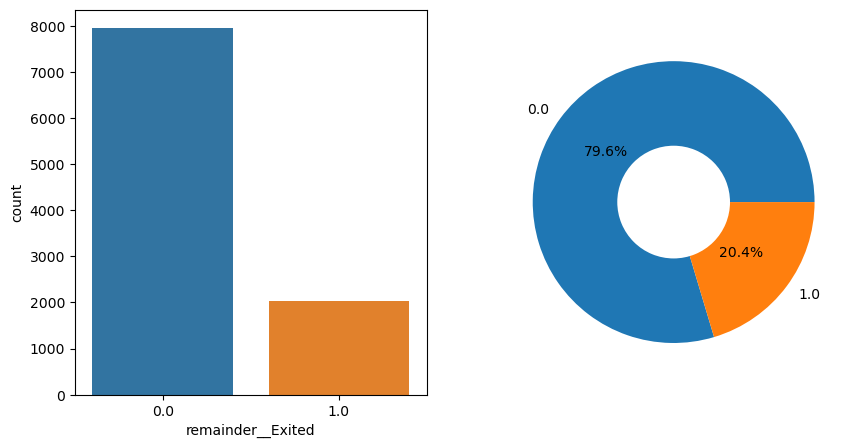

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df1.remainder__Exited)
plt.subplot(1,2,2)
plt.pie(df1.remainder__Exited.value_counts(),autopct='%1.1f%%',labels=df1.remainder__Exited.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

In [34]:
X=df1.drop(["remainder__Exited"],axis=1)
df1['remainder__Exited'] = df1['remainder__Exited'].astype(int)
y=df1["remainder__Exited"]

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

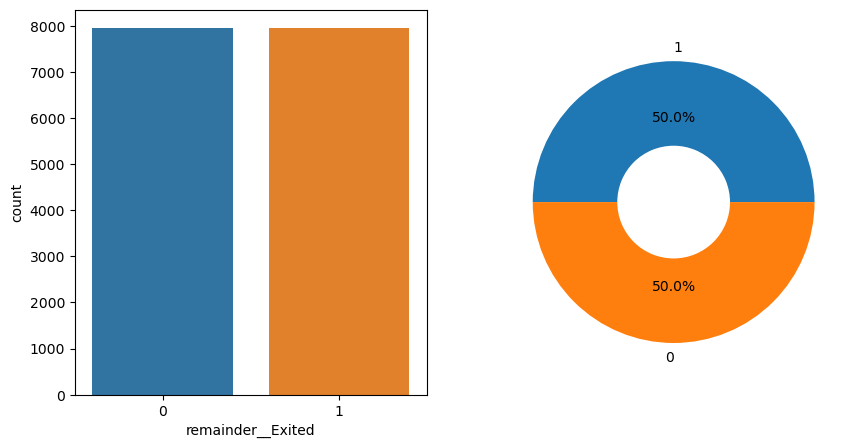

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y)
plt.subplot(1,2,2)
plt.pie(y.value_counts(),autopct='%1.1f%%',labels=y.value_counts().index)
plt.pie([1],radius=0.4,colors="w")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(12740, 28)
(3186, 28)


# PCA for Visualization

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_trn_trf=pca.fit_transform(X_train)
X_tst_trf=pca.transform(X_test)


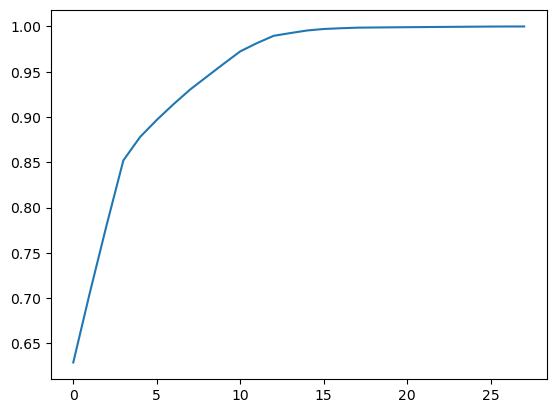

In [39]:
import seaborn as sns
sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [40]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# from sklearn.decomposition import PCA
# pca=PCA(n_components=3)
# X_train_trn = pca.fit_transform(X_train)
# X_test_trn = pca.transform(X_test)
# import plotly.express as px
# fig=px.scatter_3d(x=X_train_trn[:,0],
#     y=X_train_trn[:,1],
#     z=X_train_trn[:,2],color=y_train,)

# fig.show()

# Model Creation and Evaluation

In [41]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(15,7))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt


In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix
def scores(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = accuracy_score(y_test,y_pred)
    con = confusion_matrix(y_test,y_pred)
    print("Accuracy Score  : " ,round(acc*100,2))
    print("Precision Score : " ,round(pre*100,2))
    print("Recall Score    : " ,round(rec*100,2))
    print("F1 Score        : " ,round(f1*100,2))
    print("Confusion Matrix:\n" ,con)
    
def evaluate(model,X_test,y_test,cv=5):
    y_pred = cross_val_predict(model, X_test, y_test, cv=cv)
    scores(y_test,y_pred)


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
train_score = cross_val_score(logmodel,X_train,y_train,cv=5)
test_score = cross_val_score(logmodel,X_test,y_test,cv=5)
print("Train Score (mean):", train_score.mean())
print("Test Score (mean):", test_score.mean())

Train Score (mean): 0.7829670329670331
Test Score (mean): 0.7912727666422248


Accuracy Score  :  79.13
Precision Score :  78.76
Recall Score    :  78.3
F1 Score        :  79.13
Confusion Matrix:
 [[1305  328]
 [ 337 1216]]


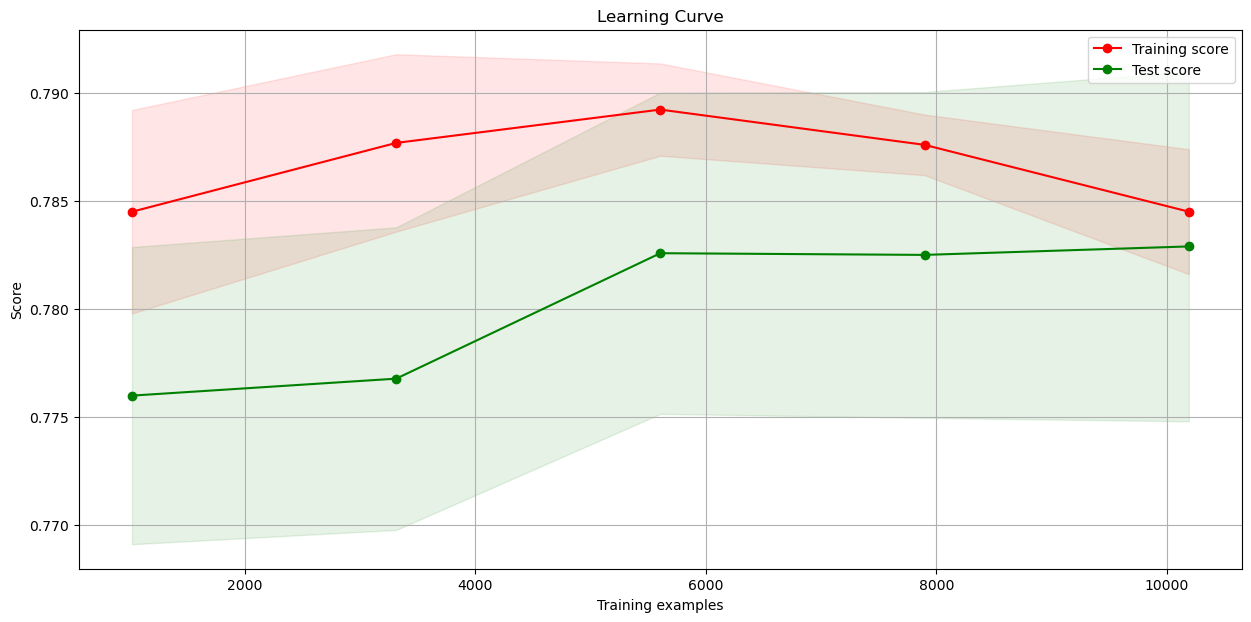

In [44]:
plot_learning_curve(logmodel, X_train, y_train, cv=5)
evaluate(logmodel,X_test,y_test)
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
train_score = cross_val_score(gb_classifier ,X_train,y_train,cv=5)
test_score = cross_val_score(gb_classifier  ,X_test,y_test,cv=5)
print("Train Score (mean):", train_score.mean())
print("Test Score (mean):", test_score.mean())

Train Score (mean): 0.8856357927786499
Test Score (mean): 0.8772769102818364


Accuracy Score  :  87.7
Precision Score :  89.46
Recall Score    :  84.74
F1 Score        :  87.7
Confusion Matrix:
 [[1478  155]
 [ 237 1316]]


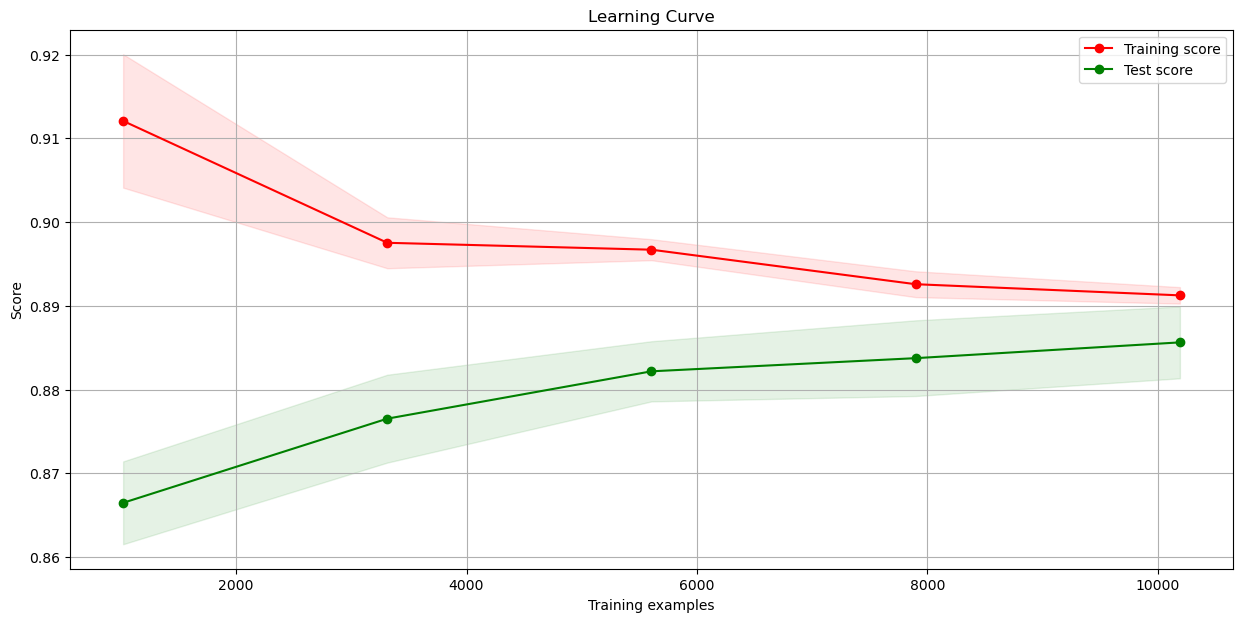

In [46]:
plot_learning_curve(gb_classifier, X_train, y_train, cv=5)
evaluate(gb_classifier,X_test,y_test)
plt.show()

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=4)
train_score = cross_val_score(xgb  ,X_train,y_train,cv=5)
test_score = cross_val_score(xgb  ,X_test,y_test,cv=5)
print("Train Score (mean):", train_score.mean())
print("Test Score (mean):", test_score.mean())

Train Score (mean): 0.8971742543171114
Test Score (mean): 0.8929671313907767


Accuracy Score  :  89.3
Precision Score :  91.17
Recall Score    :  86.41
F1 Score        :  89.3
Confusion Matrix:
 [[1503  130]
 [ 211 1342]]


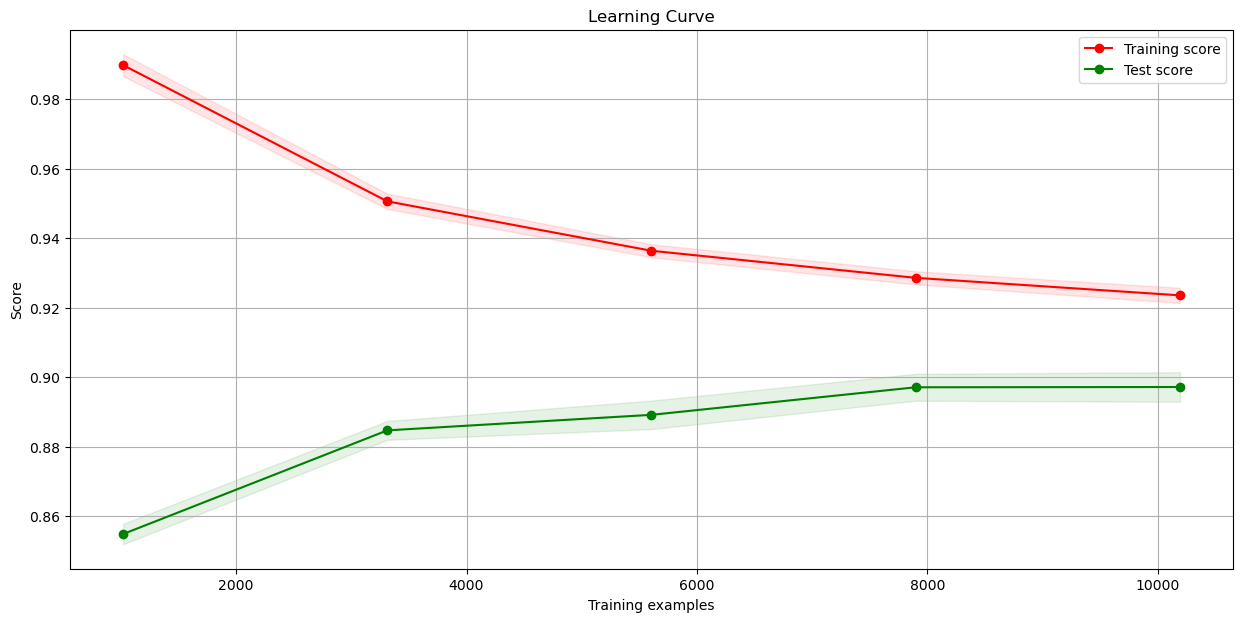

In [48]:
plot_learning_curve(xgb, X_train, y_train, cv=5)
evaluate(xgb,X_test,y_test)
plt.show()

In [49]:
X_train.shape

(12740, 28)

# Creating Neural Network model and Evaluation

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [51]:
# Creating Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(),
              metrics=["Accuracy"])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Train the model
history = model.fit(X_train, y_train,epochs=1000,batch_size=32,  validation_split=0.2)

Epoch 1/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3932 - Accuracy: 0.8206 - val_loss: 0.4274 - val_Accuracy: 0.7908
Epoch 2/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3925 - Accuracy: 0.8218 - val_loss: 0.4273 - val_Accuracy: 0.7943
Epoch 3/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3917 - Accuracy: 0.8219 - val_loss: 0.4268 - val_Accuracy: 0.7916
Epoch 4/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3909 - Accuracy: 0.8212 - val_loss: 0.4284 - val_Accuracy: 0.7920
Epoch 5/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3908 - Accuracy: 0.8204 - val_loss: 0.4281 - val_Accuracy: 0.7912
Epoch 6/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3901 - Accuracy: 0.8227 - val_loss: 0.4263 - val_Accuracy: 0.7908
Epoch 7/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3897 - Accuracy: 0.8211 - val_loss: 0.4257 - val_Accuracy:

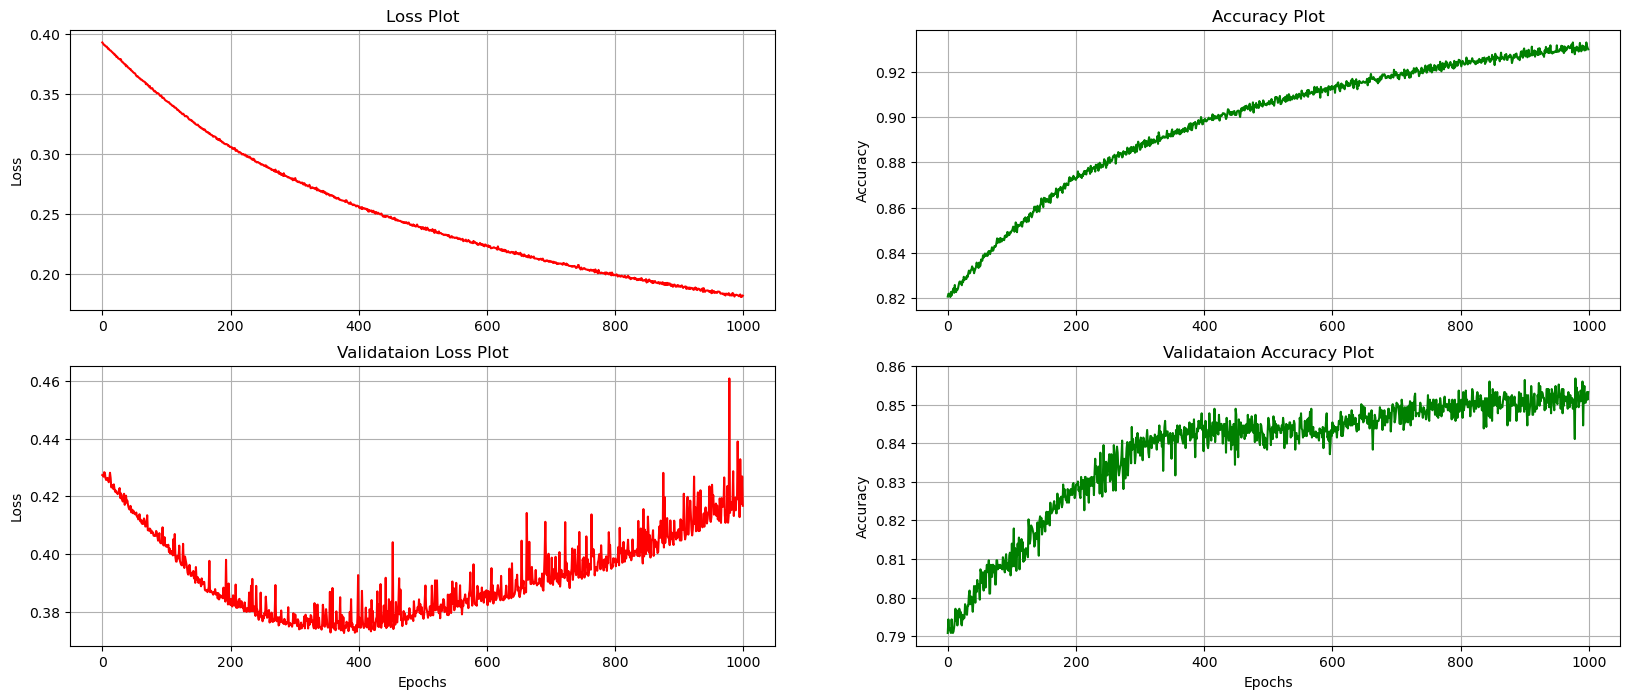

In [59]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(history.history["loss"],color="r")
plt.title("Loss Plot")
plt.ylabel("Loss")
plt.grid()
plt.subplot(2,2,2)
plt.plot(history.history["Accuracy"],color="g")
plt.title("Accuracy Plot")
plt.ylabel("Accuracy")
plt.grid()
plt.subplot(2,2,3)
plt.plot(history.history["val_loss"],color="r")
plt.title("Validataion Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.subplot(2,2,4)
plt.plot(history.history["val_Accuracy"],color="g")
plt.title("Validataion Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [60]:
def predict(val,threshold=0.5):
    if val >= threshold:
        return 1 
    else:
        return 0 

In [61]:
y_pred_prob = model.predict(X_train)
y_pred=[]
for i in y_pred_prob:
    y_pred.append(predict(i))
print("TRAIN DATA SCORES ")
scores(y_train,y_pred)

399/399 [==============================] - 1s 2ms/step
TRAIN DATA SCORES 
Accuracy Score  :  91.77
Precision Score :  91.14
Recall Score    :  92.65
F1 Score        :  91.77
Confusion Matrix:
 [[5753  577]
 [ 471 5939]]


In [62]:
y_pred_prob = model.predict(X_test)
y_pred=[]
for i in y_pred_prob:
    y_pred.append(predict(i))
print("TRAIN DATA SCORES ")
scores(y_test,y_pred)

100/100 [==============================] - 0s 2ms/step
TRAIN DATA SCORES 
Accuracy Score  :  85.56
Precision Score :  83.22
Recall Score    :  88.15
F1 Score        :  85.56
Confusion Matrix:
 [[1357  276]
 [ 184 1369]]


END....